##Question 1

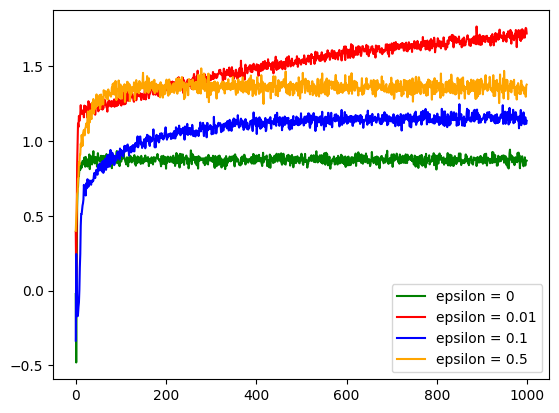

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

n_arms = 10
n_steps = 1000
n_trials = 2000

# greedy policy일 때 -------------------------------------------------------------------
epsilon = 0

np.random.seed(seed=100)

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

# 2000번 trial 진행, 먼저 리워드를 0으로 설정
for i in range(n_trials):
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)

  # 각 arm에 대해 리워드 분포 설정
  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    # 엡실론 greedy policy에 의해 가장 리워드가 큰 행동 선택
    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 Q_arm 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    # 리워드 예측값을 업데이트
    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]


plt.plot(Result_array/n_trials, color = 'green', label = 'epsilon = 0')

# epsilon-greeedy policy일 때 -------------------------------------------------------------------
epsilon = 0.01

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'red', label = 'epsilon = 0.01')

#-------------------------------------------------------------------

epsilon = 0.1

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'blue', label = 'epsilon = 0.1')

#-------------------------------------------------------------------
epsilon = 0.5

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'orange', label = 'epsilon = 0.5')
plt.legend()
plt.show()

In [ ]:
# 결과: 엡실론 값이 0.01일 때의 평균 리워드가 가장 높음, 즉 learning이 더 잘 일어남.

## Question 2

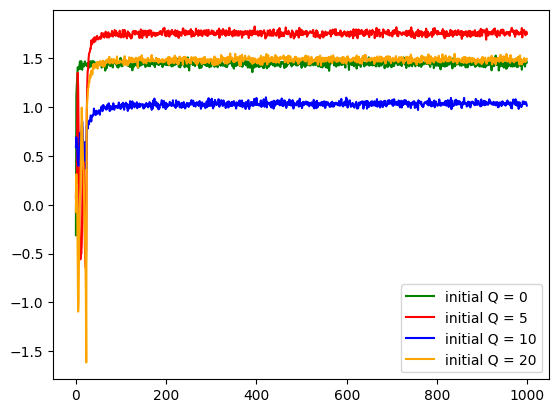

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# arm을 12개로 변경
n_arms = 12
n_steps = 1000
n_trials = 2000

# Optimistic initial value: 초기 리워드 설정을 양수로 하여, learning이 더 잘 일어나도록 함
# Initial Q = 0 #-------------------------------------------------------------------
epsilon = 0

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      # 초기 리워드 = 0, 즉 Question 1과 같은 상황
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'green', label = 'initial Q = 0')

# Initial Q = 5 #-------------------------------------------------------------------

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  # 초기 리워드를 5로 설정
  Q_arm = np.ones(n_arms) * 5
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'red', label = 'initial Q = 5')

# Initial Q = 10 #-------------------------------------------------------------------

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  # 초기 리워드를 10으로 설정
  Q_arm = np.ones(n_arms) * 10
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'blue', label = 'initial Q = 10')


# Initial Q = 20 #-------------------------------------------------------------------

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  # 초기 리워드를 20으로 설정
  Q_arm = np.ones(n_arms) * 20
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'orange', label = 'initial Q = 20')
plt.legend()
plt.show()

In [3]:
# 결과: 초기에 5의 보상을 주는 것이 적절한 explore과 exploitation이 일어나도록 도와
# 가장 큰 평균 보상값에 도달함

## Question 3

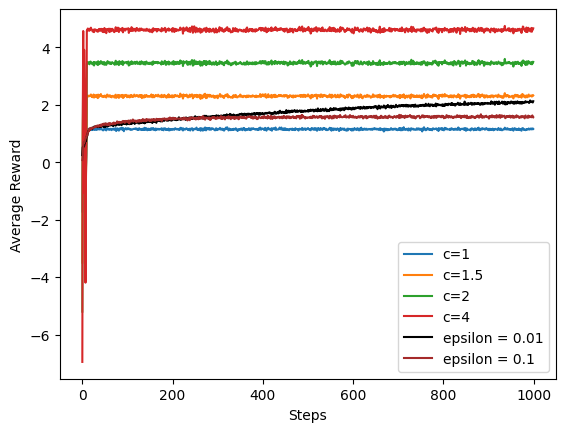

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

n_arms = 10
n_steps = 1000
n_trials = 2000
# c값을 리스트로 설정
c_values = [1, 1.5, 2, 4]

np.random.seed(seed=100)

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

# c값을 기준으로 루프 반복
for c in c_values:
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)
  ucb_action = np.zeros(n_steps) # 빈 어레이 생성

  for i in range(n_trials):
    for j in range(n_steps):
      # 리워드 값 설정
      R_arm = np.random.normal(P_arm, 1, n_arms)

      # 모든 arm을 한 번씩 실행해 보기
      if j < n_arms:
        action = j
      else:
        # 모든 arm에 대해 UCB 값 계산하고 가장 큰 값 가진 arm을 선택하기
        ucb_values = Q_arm + c * np.sqrt(np.log(j) / (N_visits + 1e-6))
        action = np.argmax(ucb_values)

      # 선택된 arm의 예측값 업데이트
      if N_visits[action] == 0:
        Q_arm[action] += R_arm[action]
      else:
        Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]

      N_visits[action] += 1
      Result_array[j] += R_arm[action]
      ucb_action[j] = action

  plt.plot(Result_array / n_trials, label='c={}'.format(c))

# Epsilon-greedy policy 와 비교-------------------------------------------------------------------

epsilon = 0.01

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'black', label = 'epsilon = 0.01')

# -------------------------------------------------------------------

epsilon = 0.1

Result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms)

for i in range(n_trials):
  Q_arm = np.zeros(n_arms)
  N_visits = np.zeros(n_arms)

  for j in range(n_steps):
    R_arm = np.random.normal(P_arm, 1, n_arms)

    if np.random.rand(1) < epsilon:
      action = np.random.choice(n_arms, 1)
    else:
      if len(set(Q_arm)) == 1:  # 모든 값이 동일할 경우, 무작위로 설정함
        action = np.random.choice(n_arms, 1)
      else:
        action = np.argmax(Q_arm) # 동일하지 않을 경우, 최대값을 설정함

    if N_visits[action] == 0:
      Q_arm[action] += R_arm[action]
    else:
      Q_arm[action] += (R_arm[action]-Q_arm[action])/N_visits[action]

    N_visits[action] += 1
    Result_array[j] += R_arm[action]

plt.plot(Result_array/n_trials, color = 'brown', label = 'epsilon = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

In [ ]:
# 결과: c = 4일 때 가장 높은 평균 보상 값을 찾아감
# 즉 현재 모르는 값을 알아보고자 하는 exploration 성향이 강할수록 더 높은 보상을 얻는 환경임